# **Day 3: Introduction to Machine Learning**

Today we will:
- Understand the Machine Learning (ML) lifecycle
- Connect ML to the analysis we did in Day 2
- Explore and compare different ML algorithms:
  - Linear Regression
  - Logistic Regression
  - Decision Trees
- Learn how to evaluate and compare models using accuracy and metrics
- Apply everything to a new dataset (SAT & College Admissions) in a self-guided challenge


#Section 1: The Machine Learning Lifecycle

The ML lifecycle is a series of stages used to build, test, and improve machine learning models:

1. **Understand the problem**
2. **Collect and clean data**
3. **Explore and visualize**
4. **Choose a model (algorithm)**
5. **Train and test the model**
6. **Evaluate performance**
7. **Tune parameters (optimization)**
8. **Deploy or interpret results**

We already did stages 1–3 on Day 2. Today, we'll complete the full cycle using the student performance dataset.


## Section 2: Linear Regression

Linear regression is used to predict **numerical values** based on one or more features.

Think of it like drawing the "best fit" straight line through your data — the line that best explains the relationship between the inputs (like GPA, AP classes) and the output (SAT score).

**Examples of functions:**
- Linear: `y = mx + b` — A straight line
- Quadratic: `y = ax² + bx + c` — A curve
- In regression, we **prefer simple lines** unless a curve is truly needed.

**Why lines?**  
Lines are easier to interpret and work surprisingly well for many problems!

### Why use Linear Regression?
- It helps us understand *how* factors like study time and school support affect a student's likelihood to pass.
- It lets us make predictions — e.g., what score might a student with **3 hours of daily study** and **strong school support** get?


---

We'll walk through the ML lifecycle using a demo dataset first: **`student_performance.csv`**.  
Then, you'll apply the full process to **`college_admissions.csv`** on your own.


In [ ]:
# Loading the demo dataset from GitHub (no need to upload manually)

import pandas as pd

demo_url = "https://raw.githubusercontent.com/anaghasiddhi/ret_tutorials_datasets/refs/heads/main/student_performance_day3.csv"

try:
    df = pd.read_csv(demo_url)
    print("Demo dataset loaded successfully!")
    df.head()
except Exception as e:
    print("Error loading demo dataset:", e)


Demo dataset loaded successfully!


## Linear Regression with the Student Performance Dataset

Linear regression is a fundamental machine learning technique used to predict **numerical outcomes** based on one or more input features.

In this example, we'll simulate how two factors — **study time** and **absences** — affect a student's performance.

But here's the twist: the dataset doesn't have a single "performance score" column we can predict. So we'll create one ourselves! and we call it a ** Synthetic variable**

### What is a Synthetic Variable?

A **synthetic variable** is one that doesn't exist in the original dataset but is **created intentionally** — either by combining other features or simulating an outcome.

We're going to create a new column called `performance_score` using this formula:

performance_score = (study_time × 25) - (absences × 2) + noise


This lets us:
- Clearly demonstrate how input features influence an outcome.
- Control the relationship (more study time = good, more absences = bad).
- Practice modeling a clean trend before dealing with real-world messiness.

This approach is great for teaching and helps us visualize how linear regression learns patterns in data.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Creating an Engineered Performance Score

We're going to simulate a student's overall performance by creating a new column:

- Each hour of **study_time** adds 25 points
- Each **absence** subtracts 2 points
- We'll add some random variation (noise) to make the data feel more realistic


In [ ]:
# Create a synthetic performance score
np.random.seed(42)  # for reproducibility
df["performance_score"] = (
    df["study_time"] * 25
    - df["absences"] * 2
    + np.random.normal(0, 5, len(df))  # small random noise
)
df[["study_time", "absences", "performance_score"]].head()


,study_time,absences,performance_score
0,3.0,4,69.483571
1,2.8,5,59.308678
2,2.0,6,41.238443
3,1.6,0,47.615149
4,1.5,5,26.329233


### Step 2: Fit a Linear Regression Model

Linear regression tries to **find a line or plane** that best fits the relationship between input variables and the target.

It learns weights `w1`, `w2`, and a bias `b` such that:

performance_score ≈ w1 * study_time + w2 * absences + b

We'll now train the model on the entire dataset (just for understanding), and **see what parameters it learns*

In [ ]:
# Select features and target
X = df[["study_time", "absences"]]
y = df["performance_score"]

# Fit model to all data (we'll split later)
lr = LinearRegression()
lr.fit(X, y)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [24.31558301 -1.93765371]
Intercept: 0.3800810681634701


### Visualizing the Model Fit

We'll now visualize how well the model fits **all the data**.

This isn't a proper evaluation, but it helps us understand the kind of line or plane the model is learning.

We will essentially plug in the coefficients and the intercept value to plot the line that has been **fit** for this dataset.


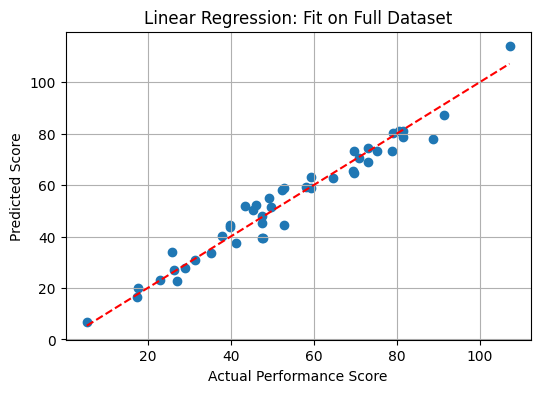

In [ ]:
# Predict on the full dataset
y_pred_full = lr.predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred_full)
plt.plot(
    [min(y), max(y)],
    [min(y), max(y)],
    color='red', linestyle='--'
)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Linear Regression: Fit on Full Dataset")
plt.grid(True)
plt.show()


### Does it work?: Predict a Student's Performance

Let’s write a function that uses the trained model to predict a score.

You’ll enter:
- Number of hours the student studies daily
- Number of absences

And it will return a predicted performance score!


In [ ]:
def predict_performance(study_time, absences):
    input_data = np.array([[study_time, absences]])
    predicted_score = lr.predict(input_data)[0]
    print(f"Predicted Performance Score: {predicted_score:.2f}")

# Try it out
predict_performance(study_time=3, absences=1)


Predicted Performance Score: 71.39


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Why We *Don't* Usually Train on All the Data

So far, we've trained our model on **all available data** and tested it on the same data.

That’s like giving a student a test they already saw the answers to. Of course they'll do well!  
But how will they perform on **new** questions?

---

### The Risk: Overfitting

When a model sees all the data during training, it may:

- Memorize specific examples instead of learning general patterns
- Appear to perform well, even if it's not truly accurate on unseen data

This is called **overfitting** — and it can be very misleading.

---

### Real-World Example

Imagine a model that predicts SAT scores based on GPA.  
If one student in the training data had a GPA of 4.0 and a perfect SAT score, the model might "lock onto" that one example.

Now if a new student also has a GPA of 4.0 but missed the SAT due to illness... the model might **still predict a perfect score**, even though it's wrong.

---

### The Solution: Train-Test Split

To **honestly evaluate** how well a model generalizes, we split the data:
- **Training Set**: used to learn
- **Test Set**: used to evaluate

This mimics real-world scenarios where you train a model on historical data and then use it to make future predictions.

We’ll do that next.


### Splitting the Data for Honest Evaluation

Now let's do it the right way — we'll split the data into:

- **Training Set** (80%): to learn from
- **Test Set** (20%): to evaluate model performance on unseen data

This helps us check if the model can actually generalize to new situations.


In [ ]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X = df[["study_time", "absences"]]
y = df["performance_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a new model on the training set only
lr_split = LinearRegression()
lr_split.fit(X_train, y_train)


LinearRegression()

### Predicting on the Test Set

We’ll now use the trained model to make predictions **only** on the test set — data it hasn't seen before.


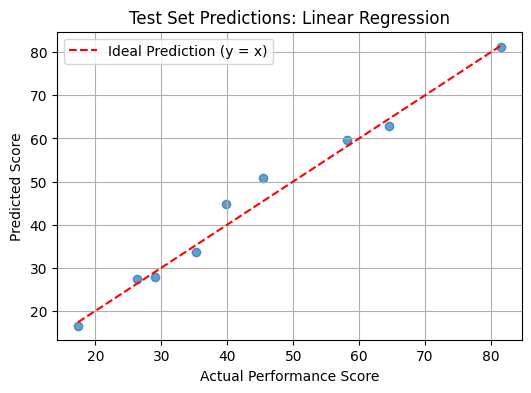

In [ ]:
# Predict and plot
y_pred = lr_split.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color='red', linestyle='--', label="Ideal Prediction (y = x)"
)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Test Set Predictions: Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


### Summary: What Did We Just Do?

We used **linear regression** to predict a **numerical outcome** — a performance score based on study time and absences.

- We **created** a target variable (`performance_score`) so we could clearly see what the model is learning.
- We trained the model on part of the data, and tested it on new data to check its generalization.
- Our scatter plot shows that predictions generally follow the trend — the closer they are to the red line, the better.

This is a solid use case for **regression** because:
- The target is continuous (a number),
- The relationship is roughly linear (more study time → higher score, more absences → lower score).

But what if…

- The thing we're predicting isn’t a number?
- We want to answer a **yes/no question** instead?


This is where linear regression fails — and **logistic regression** comes in.


## Why Do We Need More Than Linear Regression?

Let’s say instead of predicting a **score**, we want to predict whether a student will **pass or fail**.

That’s not a number — it’s a **category**.

If we tried using linear regression, we might get predictions like:

- 1.2 → ??? (more than 100% chance of passing?)
- -0.3 → ??? (negative chance of passing?)

Linear regression can’t handle this kind of problem properly.

We need a model that:
- Predicts probabilities (between 0 and 1),
- Handles **classification** problems,
- Still uses a simple, interpretable equation.

This is what **logistic regression** is designed for.

Let’s walk through it next using the same dataset, but this time predicting whether a student passed or not.


## Section 3: Logistic Regression - Predicting Categories (Yes/No)

Now let’s shift from predicting **numbers** to predicting **categories**.

Our goal is to predict whether a student **passed or not** based on their study time and absences.

This is a **binary classification** problem — the outcome is one of two categories: `"yes"` or `"no"`.

We’ll use **logistic regression**, a model that:
- Predicts probabilities between 0 and 1
- Uses a logistic (S-shaped) curve instead of a line
- Is ideal when your target is a yes/no or true/false type variable

### Here's what we'll do:

1. Load the dataset  
2. Select `study_time` and `absences` as features  
3. Convert the `passed` column into a binary numeric format (0 = "no", 1 = "yes")  
4. Split into training and test sets  
5. Train a logistic regression model  
6. Predict on the test set  
7. Evaluate using precision, recall, and F1-score



In [ ]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/anaghasiddhi/ret_tutorials_datasets/refs/heads/main/student_performance_day3.csv")
df[["study_time", "absences", "passed"]].head()

,study_time,absences,passed
0,3.0,4,yes
1,2.8,5,yes
2,2.0,6,no
3,1.6,0,no
4,1.5,5,no


### Converting "passed" into Numbers

Most ML models need the target variable to be **numeric**.

We’ll convert:
- `"yes"` → `1`
- `"no"` → `0`

Here’s how this line of code works:
```
df["passed"].apply(lambda x: 1 if x == "yes" else 0)


Let’s break it down with an example:

If we have a column like:

passed

yes

no

yes

Then .apply(lambda x: 1 if x == "yes" else 0) will return:

passed (binary)

1

0

1
```



In [ ]:
# Select features and convert target to binary
X = df[["study_time", "absences"]]
y = df["passed"].apply(lambda x: 1 if x == "yes" else 0)


### Train-Test Split (With Stratify)

We want both classes ("yes" and "no") to appear fairly in both training and test sets.

So we use `stratify=y` when splitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Use stratify for balanced splits
)


### Training the Logistic Regression Model

This works just like linear regression — but under the hood, it’s using a **logistic curve** instead of a line.


In [ ]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

### Visualizing the Logistic Regression Model

Let’s plot the data points and the **decision boundary** the model has learned.

- Blue points: students who failed (label 0)
- Orange points: students who passed (label 1)
- Black line: boundary where the model is 50/50 between predicting pass or fail

This helps us **see** how logistic regression separates the two classes based on study time and absences.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


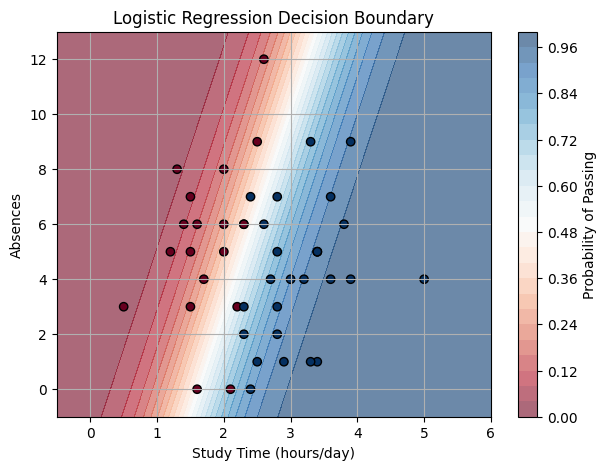

In [ ]:
# Create a meshgrid of values for plotting the decision boundary
x_min, x_max = X["study_time"].min() - 1, X["study_time"].max() + 1
y_min, y_max = X["absences"].min() - 1, X["absences"].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Flatten and combine for prediction
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr_model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.6)
plt.colorbar(label="Probability of Passing")
scatter = plt.scatter(
    X["study_time"], X["absences"], c=y, cmap="RdBu", edgecolor="k"
)
plt.xlabel("Study Time (hours/day)")
plt.ylabel("Absences")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


### Interpreting the Logistic Regression Decision Boundary Plot

This plot helps us **visualize how logistic regression separates students who passed vs. did not pass** based on:

- `study_time` (x-axis)
- `absences` (y-axis)

---

#### What You’re Seeing:

- **Background Color**: This shows the model’s **predicted probability of passing**
  - **Red areas** = low probability of passing
  - **Blue areas** = high probability of passing
  - **White band** = uncertain region (~50% prediction boundary)

- **Black Dots**: Each point represents one student.
  - Their position is based on actual values for `study_time` and `absences`.
  - Their color is not label-dependent in this plot; it's just to show where data exists.

- **Straight boundary**: Since logistic regression fits a **linear model**, the decision surface is straight — not curved. It’s most confident in extreme regions and uncertain near the boundary.

---

###  About the Warning

You may have seen this message:

UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names


This happens because:

- When training the model, we passed in a **DataFrame** (`X_train`) that has column names (`study_time`, `absences`).
- When plotting, we used a **NumPy array** (`grid`) with no column names.

Scikit-learn gives this warning just to let you know:  
*"Hey, your input used to have labels — now it doesn't!"*

But it's **just a warning**, not an error — and the prediction still works fine.

You can safely ignore it in this case.

####  Why This Matters:

This decision boundary shows us that:

- Students who study more and have fewer absences are more likely to pass.
- Logistic regression models this with a **straight line**, which may miss more complex patterns.
- This is useful for interpretation — but limited if real-world patterns are nonlinear.



### Evaluating Our Model: Why One Prediction Isn’t Enough

Once we’ve trained a machine learning model, we need to **test how well it performs**.  
It’s not enough to just hope it works — we need evidence.

---

### Can we test it one student at a time?

Yes — technically, we could manually input:
- Study time: 2 hours  
- Absences: 3

Then ask the model: **“Will this student pass?”**

But this has serious problems:

- It's **slow** and **manual**.
- It only tells us if the model works for **one case**.
- It doesn’t tell us if the model is **biased**, **unbalanced**, or **wrong most of the time**.

---

### So what do we do instead?

We test the model on **lots of unseen data at once** (our test set), and use a tool called a **classification report**.

This report summarizes:
- **Precision**: How many predicted "yes" cases were actually "yes"?
- **Recall**: How many real "yes" cases the model successfully found?
- **F1-score**: A balance of precision and recall

By looking at these metrics for **both classes** (pass and fail), we get a much clearer picture of whether the model is actually doing a good job.

Let’s try it now.


In [ ]:

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=["No", "Yes"]))



              precision    recall  f1-score   support

          No       1.00      0.75      0.86         4
         Yes       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



### What Do These Metrics Actually Mean?

When we evaluate a classification model, we often look at four main metrics:

---

**1. Accuracy**  
> “Out of all predictions, how many were correct?”

This is the most intuitive metric.  
But it can be misleading if one class is much more common than the other.

---

**2. Precision**  
> “When the model says ‘yes’, how often is it right?”

Think of this like a **spam filter** — we care a lot about not marking real emails as spam (false positives).

High precision = few false alarms.

---

**3. Recall (Sensitivity)**  
> “Of all the real ‘yes’ cases, how many did we catch?”

This is like a **COVID test** — we want to catch as many actual positive cases as possible.

High recall = few missed cases.

---

**4. F1-Score**  
> A balance between precision and recall

If one is high but the other is low, the F1-score brings them together into a single number.

It’s useful when we want a **balanced performance**, not just accuracy.


---

### So What Are **Macro avg** and **Weighted avg**?

At the bottom of the report, you’ll often see:

| Metric        | Meaning                                                                 |
|---------------|-------------------------------------------------------------------------|
| **macro avg** | Average of scores across all classes **treating all classes equally**   |
| **weighted avg** | Average of scores **weighted by how many examples are in each class** |

These are helpful when:
- You want to compare performance across classes
- You’re dealing with **class imbalance** (e.g., 90 "No" and 10 "Yes")

---

### Interpreting These in *Our Case*

In your model:

- Class "No" had 4 samples, and class "Yes" had 5
- The model was better at predicting **"Yes"** (recall = 1.00) than **"No"** (recall = 0.75)
- Because of this, **macro avg** and **weighted avg** are not identical

- **Macro avg** treats "No" and "Yes" equally, so it highlights imbalances in performance
- **Weighted avg** gives slightly more influence to the majority class ("Yes"), smoothing the overall score

These two averages give you **more nuanced insight** when individual class metrics differ — as they do here.

---


 **Tip:**  
- Use **macro avg** when fairness or equal attention to each class matters  
- Use **weighted avg** when you want an overall performance score that accounts for class distribution



### Summary: Why We Use a Classification Report

Instead of calculating all metrics manually every time, we can use:

```python
from sklearn.metrics import classification_report
```
This generates all the important metrics for each class (passed and not passed),
and even gives us macro and weighted averages across both.

It's fast, standardized, and great for comparing multiple models later.




## Confusion Matrix: What Did the Model Get Right (and Wrong)?

A **confusion matrix** helps us see where the model is making mistakes — not just how often it’s right.

It breaks predictions into four categories:

|               | Predicted No | Predicted Yes |
|---------------|--------------|----------------|
| **Actual No** | True Negative (TN) | False Positive (FP) |
| **Actual Yes**| False Negative (FN)| True Positive (TP)  |

---

### Why is this helpful?

Let’s say a student actually **failed**, but the model predicted they would **pass**.  
That’s a **false positive** — and that’s a big mistake in many real-life applications (like medicine, finance, or admissions).

The confusion matrix gives us **granular insight** into:
- What kinds of errors the model makes
- Whether it’s biased toward one class
- How it could be improved

Let’s generate it.


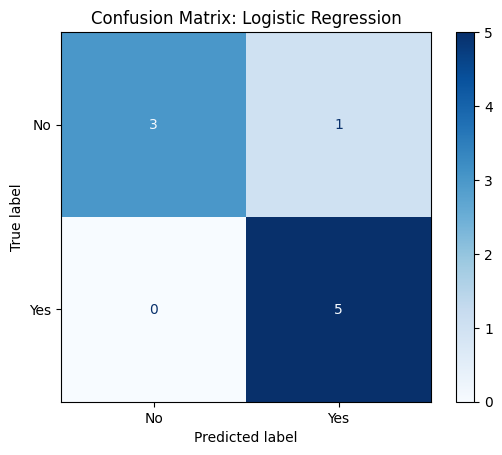

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display it with labels
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No", "Yes"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()


### Interpreting the Confusion Matrix for Logistic Regression

Let’s break it down using the values from the confusion matrix:


- **True Negatives (TN = 3)**  
  The model correctly predicted **"No"** for 3 students who did not pass.

- **False Positives (FP = 1)**  
   The model incorrectly predicted **"Yes"** for 1 student who actually did **not pass**.  
  → This could represent a false sense of readiness.

- **False Negatives (FN = 0)**  
  The model **did not miss** any students who actually passed.  
  → Great recall for the "Yes" class.

- **True Positives (TP = 5)**  
  The model correctly predicted **"Yes"** for 5 students who passed.

---

### What This Tells Us

- The model made **one mistake**, predicting a non-passing student as a passing one.
- It performed **very well overall**, especially for identifying students who passed.
- The **"No" class** had slightly lower recall (3 out of 4 correctly identified).
- These results match the **classification report**, where:
  - **Precision** was slightly lower for "Yes" (due to the false positive)
  - **Recall** was perfect for "Yes", but lower for "No"

---

### Why This Is Useful

- Unlike earlier runs where the model was perfect, this version shows **real-world trade-offs**:
  - High recall for "Yes" → model catches all successful students
  - Lower precision for "Yes" → model makes some incorrect optimistic predictions

This makes it easier to compare models like **Decision Tree** vs **Logistic Regression** in a meaningful way.

---

### Reminder:

Confusion matrices help you understand **what kinds of errors the model makes** — not just how many.

Always combine this with:
- **Precision** (to measure false positives)
- **Recall** (to measure false negatives)
- And **F1-score** for overall balance


Always evaluate models on **larger test sets** when possible, and be skeptical of perfect scores on very small samples!




## But What If the Relationship Isn't Linear?

Logistic Regression is great when the decision boundary between classes is relatively **simple and smooth** — like a sloped line or a gradual curve.

It uses a mathematical formula to draw a **straight boundary** in feature space (or a plane in higher dimensions).  
That’s why it performed well in our earlier results — but not perfectly:

- It correctly identified all students who passed (great recall )
- But it **mistakenly predicted one fail case as a pass** (false positive )

This shows a key limitation:
- Logistic regression assumes that the relationship between inputs and outcomes is **linear** — that is, it can be split cleanly with a single slope or curve.
- But **real-world data isn't always that cooperative.**

---

### That’s Where Decision Trees Come In

Decision Trees don’t try to fit a single formula — instead, they make a series of **if-then rules** like:

- *“Is study_time > 2?”*
- *“Are absences ≤ 4?”*

They work by:
- Splitting the data step-by-step using conditions that best separate the target labels
- Creating a flowchart-like structure that’s **easy to visualize and explain**
- Naturally handling **non-linear patterns**, outliers, and interactions between features

In the next section, we’ll:
1. Manually compute a decision split using the Gini Index  
2. Then build a full decision tree using `scikit-learn` and see how it performs


## Section 4: Decision Trees (Manual + Code)


Let’s explore how a **Decision Tree** makes predictions step-by-step.

Unlike logistic regression (which draws a smooth curve), decision trees ask **yes/no questions** and split the data accordingly.

Each "branch" in the tree:
- Tests a condition (like `study_time > 2.5`)
- Sends data to the left or right depending on the result
- Ends at a **leaf** that makes a prediction: **"Yes" or "No"**

You can think of a decision tree as a **flowchart**:
- Every question narrows down possibilities
- Until we reach a confident decision

We’ll start with a small dataset and **build the first split by hand** using the Gini index.  
Then we’ll verify our understanding by using **scikit-learn to**


## Manual Decision Tree Computation (Required Exercise)

Let’s walk through how a decision tree decides its **first split** — using logic, not magic!

We’ll manually compute which feature creates the best separation in the data using a metric called the **Gini index**.

This activity helps you understand **how trees "think"** before we let the computer take over.

---

### Step 1: Mini Dataset

We’ll use this small dataset of 6 students:

| Student | Study Time | Absences | Passed |
|---------|------------|----------|--------|
| S1      | 4          | 2        | Yes    |
| S2      | 3          | 4        | Yes    |
| S3      | 2          | 10       | No     |
| S4      | 1          | 6        | No     |
| S5      | 4          | 1        | Yes    |
| S6      | 2          | 9        | No     |

Our goal: figure out which feature — **study_time** or **absences** — gives us a better first split.

---

### Step 2: Gini Index Formula

The **Gini index** measures how "impure" or mixed a group is. The lower the Gini, the more **pure** (i.e., mostly one label).

**Formula:**  
**Gini = 1 - (p_yes² + p_no²)**

Where:
- `p_yes` = proportion of students who passed
- `p_no` = proportion of students who did not pass

We compute:
1. Gini for each group **after a split**
2. A **weighted average** based on how many students are in each group

---

### Step 3: Try a Split — `study_time ≥ 3`

Let’s try splitting based on **study_time ≥ 3**.

**Group A (study_time ≥ 3)** → S1, S2, S5  
- Passed: 3 Yes, 0 No  
- Gini = 1 - (3/3)² = **0.0**

**Group B (study_time < 3)** → S3, S4, S6  
- Passed: 0 Yes, 3 No  
- Gini = 1 - (3/3)² = **0.0**

**Perfect split!** Each group is completely pure.

**Weighted Gini for this split:**  
(3/6 × 0.0) + (3/6 × 0.0) = **0.0**

---

### Step 4: Now You Try — `absences ≤ 5`

Split the students based on **absences ≤ 5**.

- **Group A**: `absences ≤ 5`  
- **Group B**: `absences > 5`

Your task:

1. Count how many in each group passed or didn’t pass  
2. Calculate the Gini index for both groups  
3. Find the **weighted average Gini**

 **Question:** Which feature gave the better split — `study_time` or `absences`?

 Write your steps and answer below.


Answer:

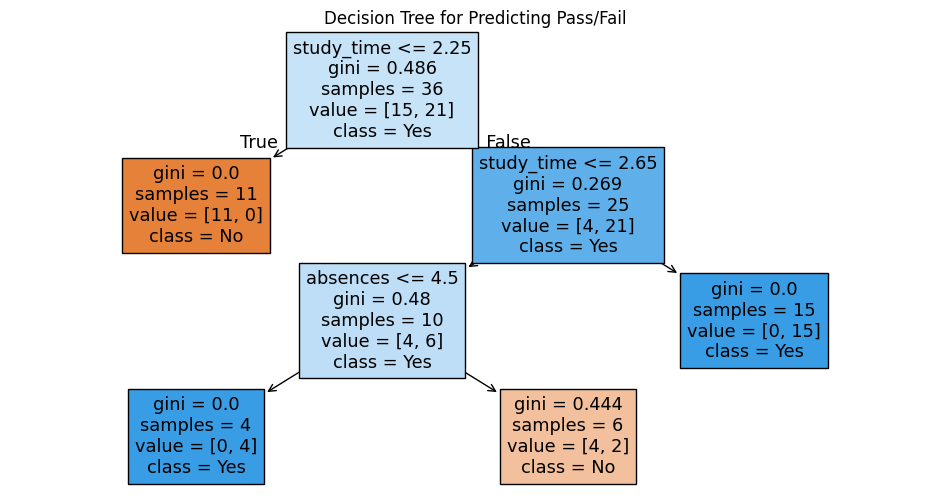

In [ ]:
#Decision Tree computation using code

from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=["study_time", "absences"], class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree for Predicting Pass/Fail")
plt.show()


### Visualizing and Interpreting the Decision Tree

We’ve now trained a **Decision Tree classifier** on the student performance dataset.



Each **box** in the tree shows a decision the model made during training:

- **Top Node**: This is the root of the tree. It holds the **first split** (e.g., `study_time ≤ 2.25`)
- **Arrows**: Each split sends data left or right based on the condition.
  - **Left branch = True** (condition met)
  - **Right branch = False** (condition not met)

Each node contains:

- `gini`: A measure of **impurity** (0.0 = pure, 0.5 = mixed evenly)
- `samples`: Number of students at that node
- `value`: How many belong to each class — `[No, Yes]`
- `class`: The majority class predicted at that node

---

###  What This Tree Learned

- The first and most important split is `study_time ≤ 2.25`
  - Students who study **very little** are likely to fail — pure "No" node on the left
- Students who study more get split again:
  - Those between `2.25` and `2.65` are further split by `absences ≤ 4.5`
    - This shows **attendance still matters**, even with decent study time
- Students with both **high study time and low absences** are confidently predicted as passing (`gini = 0.0`)

---

###  Why This is Powerful

Unlike logistic regression (which draws one straight line), decision trees:

- Can create **step-wise, nonlinear splits**
- Are highly **interpretable** (you can explain them to a non-technical audience)
- Automatically find the **best rules** based on the data

This tree structure shows not just that study time matters — but **how much is enough**, and **when attendance becomes a tipping point**.

Later, we can compare this model's performance to logistic regression using metrics like accuracy and F1-score.


## Section 5: Compare Algorithms — Evaluation Metrics

Now that we’ve trained both **Logistic Regression** and **Decision Tree** models on the same dataset, let’s compare how well they perform — not just overall, but in how they make decisions differently.

We’ll use four key evaluation metrics:

| Metric     | What it Tells Us                                                      |
|------------|------------------------------------------------------------------------|
| Accuracy   | Out of all predictions, how many were correct?                         |
| Precision  | Of all the students predicted to pass, how many actually passed?       |
| Recall     | Of all students who actually passed, how many did we correctly predict?|
| F1 Score   | A balance between precision and recall                                 |

These metrics help us **go beyond accuracy**, especially when:
- The two classes ("Yes" and "No") are not equally represented
- One model makes **fewer false positives** but **more false negatives** (or vice versa)

We’ll also use the **confusion matrix** to see:
- Not just how many mistakes each model made
- But **what kind** of mistakes: over-predicting passes? Missing actual failures?

This comparison helps us choose not just the “most accurate” model — but the one that fits the **goals and risks** of the problem best.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logreg_pred = lr_model.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)
print(" Logistic Regression")
print("Accuracy:", round(logreg_acc, 2))
print("Confusion Matrix:\n", logreg_cm)
print(classification_report(y_test, logreg_pred, labels=[0, 1], target_names=["No", "Yes"]))

# Decision Tree
tree_pred = clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)
print("\n Decision Tree")
print("Accuracy:", round(tree_acc, 2))
print("Confusion Matrix:\n", tree_cm)
print(classification_report(y_test, tree_pred, labels=[0, 1], target_names=["No", "Yes"]))


 Logistic Regression
Accuracy: 0.89
Confusion Matrix:
 [[3 1]
 [0 5]]
              precision    recall  f1-score   support

          No       1.00      0.75      0.86         4
         Yes       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9


 Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[4 0]
 [0 5]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Reflection: Which Model Would You Trust?

Now that we’ve compared both models side-by-side, we’re seeing real differences:

---

#### Logistic Regression:
- **Accuracy:** 0.89  
- **Confusion Matrix:** 1 false positive  
- **Strength:** Found all students who actually passed (100% recall)  
- **Weakness:** Predicted one student would pass who actually didn’t (false hope)

---

####  Decision Tree:
- **Accuracy:** 1.00  
- **Confusion Matrix:** Perfect — no false positives or negatives  
- **Strength:** Captured both classes cleanly  
- **Caution:** Trees can sometimes overfit small datasets — so perfect accuracy might not generalize

---

###  Think Critically

Use the metrics and confusion matrices above to reflect:

- Which model do you **trust more**, and why?
- Logistic Regression made a mistake — but was it a serious one? What could the impact be?
- The Decision Tree made **no mistakes**, but could it be **too confident**?
- These results come from a **very small test set** (just 9 students).  
  Would that affect your confidence in using the model in real life?

---

###  If You Had to Present This to a School Team:

Imagine you're explaining your results to a group of teachers or administrators.

- Which model would you recommend?
- Would you emphasize accuracy, fairness, or explainability?
- How would you explain the mistake made by logistic regression?
- Would you advise using the model now, or collecting more data first?




## Section 6: Self Practice — College Admissions

Now it’s your turn to walk through the **full machine learning lifecycle** on your own!

You’ll use the `college_admissions.csv` dataset to build and evaluate models that predict whether a student will be **admitted to college** based on their academic and personal background.

---

### Your Task: Complete the Full ML Pipeline

1. **Define the Problem**
   - Use the `admitted` column (`yes` or `no`) as your target variable.

2. **Select Features**
   - Choose relevant predictors like `gpa`, `num_ap_classes`, `extracurriculars`, and `first_gen`.

3. **Prepare the Data**
   - Use `pd.get_dummies()` to convert any **categorical features** into numeric format.

4. **Split the Dataset**
   - Use `train_test_split()` with `stratify=y` to ensure class balance in training/testing.

5. **Train Two Models**
   - Fit both **Logistic Regression** and **Decision Tree** classifiers on your training data.

6. **Evaluate Performance**
   - Use `accuracy_score`, `confusion_matrix`, and `classification_report`.
   - Interpret your results — don’t just report numbers.

7. **Experiment and Tune**
   - Try changing model parameters (like `max_depth`) or including/excluding features to improve performance.

8. **Compare and Reflect**
   - Which model performed better?
   - Which model would be easier to explain to a non-technical audience?

---

### Deliverable: Write a Short Summary

In your own words, answer the following:

- What process did you follow to prepare and train your models?
- Which model performed best — and how do you know?
- What features were most informative?
- If you had to present this to a school team, which model would you recommend, and why?

Tip: Don’t just focus on metrics — explain what your results mean and how you interpreted them.


In [ ]:
# TODO: Step 1 – Load the dataset

# Loading the challenge dataset from GitHub

import pandas as pd

demo_url = "https://raw.githubusercontent.com/anaghasiddhi/ret_tutorials_datasets/refs/heads/main/college_admissions.csv"

try:
    college_df = pd.read_csv(demo_url)
    print("Demo dataset loaded successfully!")
    college_df.head()
except Exception as e:
    print("Error loading demo dataset:", e)



